# LA Homes

In [169]:
import geopandas as gpd
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


from cartoframes.viz import Map, Layer
from cartoframes.viz.widgets import formula_widget, category_widget, histogram_widget
from cartoframes.viz.styles import color_category_style, color_continuous_style

pd.options.display.max_columns = 100

In [170]:
gdf = gpd.read_file('la_homes_original_copy.geojson')

In [171]:
gdf.shape

(133326, 40)

In [98]:
gdf.head()

cartodb_id safract  objectid         ain    formatted_            saaddr  \
0        3098    None     60810  4046011017  4046-011-017   4108 W 122ND ST   
1        4829    None     95939  4131016010  4131-016-010    676 W PALM AVE   
2        5331    None    106665  4052029033  4052-029-033   13906 YUKON AVE   
3        8425    None    168998  4064025017  4064-025-017  14783 ROXTON AVE   
4        9903    None    197082  7469002005  7469-002-005     779 W 26TH ST   

                saaddr2       saledate  formatte_1  saleprice    size  \
0    HAWTHORNE CA 90250  1526601600000  05/18/2018     600006  1197.0   
1   EL SEGUNDO CA 90245  1505260800000  09/13/2017    1485014  2044.0   
2    HAWTHORNE CA 90250  1540252800000  10/23/2018     505005   750.0   
3      GARDENA CA 90249  1515456000000  01/09/2018     536005   800.0   
4  LOS ANGELES CA 90731  1552608000000  03/15/2019     619006   861.0   

   bedrooms  bathrooms yearbuilt effective_ usecode usetype       sastr  \
0       3.0        2.0      1947       1961    0100     SFR    122ND ST   
1       4.0        3.0      2005       2005    0100     SFR    PALM AVE   
2       2.0        1.0      1952       1952    0100     SFR   YUKON AVE   
3       2.0        1.0      1944       1944    0100     SFR  ROXTON AVE   
4       2.0        1.0      1952       1952    0100     SFR     26TH ST   

   sanum saunit  formatte_2 formatte_3                            propertylo  \
0   4108   None    $600,006      1,197  4108 W 122ND ST  HAWTHORNE CA  90250   
1    676   None  $1,485,014      2,044  676 W PALM AVE  EL SEGUNDO CA  90245   
2  13906   None    $505,005        750  13906 YUKON AVE  HAWTHORNE CA  90250   
3  14783   None    $536,005        800   14783 ROXTON AVE  GARDENA CA  90249   
4    779   None    $619,006        861  779 W 26TH ST  LOS ANGELES CA  90731   

    generaluse               specificus  landvalue  improvemen  landbaseye  \
0  Residential  Single Family Residence     455430      156570        2018   
1  Residential  Single Family Residence    1157088      357612        2018   
2  Residential  Single Family Residence     400000      105000        2019   
3  Residential  Single Family Residence     437376      109344        2018   
4  Residential  Single Family Residence     286043       71507        2002   

     assessorid  impbaseyea  sqftmain  totbuildin  units  totallandi  \
0  4046-011-017        2018      1197           1      1      612000   
1  4131-016-010        2018      2044           1      1     1514700   
2  4052-029-033        2019       750           1      1      505000   
3  4064-025-017        2018       800           1      1      546720   
4  7469-002-005        2002       861           1      1      357550   

   totalvalue  totalexemp  nettaxable   taxrateare            city  \
0      612000           0      612000    HAWTHORNE    HAWTHORNE CA   
1     1514700           0     1514700   EL SEGUNDO   EL SEGUNDO CA   
2      505000           0      505000    HAWTHORNE    HAWTHORNE CA   
3      546720           0      546720      GARDENA      GARDENA CA   
4      357550           0      357550  LOS ANGELES  LOS ANGELES CA   

                                            geometry  
0  MULTIPOLYGON (((-118.34632 33.92183, -118.3463...  
1  MULTIPOLYGON (((-118.42469 33.92498, -118.4246...  
2  MULTIPOLYGON (((-118.33479 33.90536, -118.3347...  
3  MULTIPOLYGON (((-118.32140 33.89754, -118.3214...  
4  MULTIPOLYGON (((-118.29376 33.72053, -118.2937...

In [172]:
gdf.columns

Index(['cartodb_id', 'safract', 'objectid', 'ain', 'formatted_', 'saaddr',
       'saaddr2', 'saledate', 'formatte_1', 'saleprice', 'size', 'bedrooms',
       'bathrooms', 'yearbuilt', 'effective_', 'usecode', 'usetype', 'sastr',
       'sanum', 'saunit', 'formatte_2', 'formatte_3', 'propertylo',
       'generaluse', 'specificus', 'landvalue', 'improvemen', 'landbaseye',
       'assessorid', 'impbaseyea', 'sqftmain', 'totbuildin', 'units',
       'totallandi', 'totalvalue', 'totalexemp', 'nettaxable', 'taxrateare',
       'city', 'geometry'],
      dtype='object')

In [100]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 133326 entries, 0 to 133325
Data columns (total 40 columns):
cartodb_id    133326 non-null int64
safract       260 non-null object
objectid      133326 non-null int64
ain           133326 non-null object
formatted_    133326 non-null object
saaddr        133326 non-null object
saaddr2       130725 non-null object
saledate      133326 non-null object
formatte_1    133326 non-null object
saleprice     133326 non-null int64
size          127698 non-null float64
bedrooms      122465 non-null float64
bathrooms     123457 non-null float64
yearbuilt     133326 non-null object
effective_    133326 non-null object
usecode       133295 non-null object
usetype       133326 non-null object
sastr         130725 non-null object
sanum         133326 non-null object
saunit        24040 non-null object
formatte_2    133326 non-null object
formatte_3    127698 non-null object
propertylo    130725 non-null object
generaluse    133326 non-null obje

In [125]:
missing_val_count_by_column = (gdf.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

safract       133066
saaddr2         2601
size            5628
bedrooms       10861
usecode           31
sastr           2601
saunit        109286
formatte_3      5628
propertylo      2601
specificus        20
city            2601
dtype: int64


#### The number of missing values

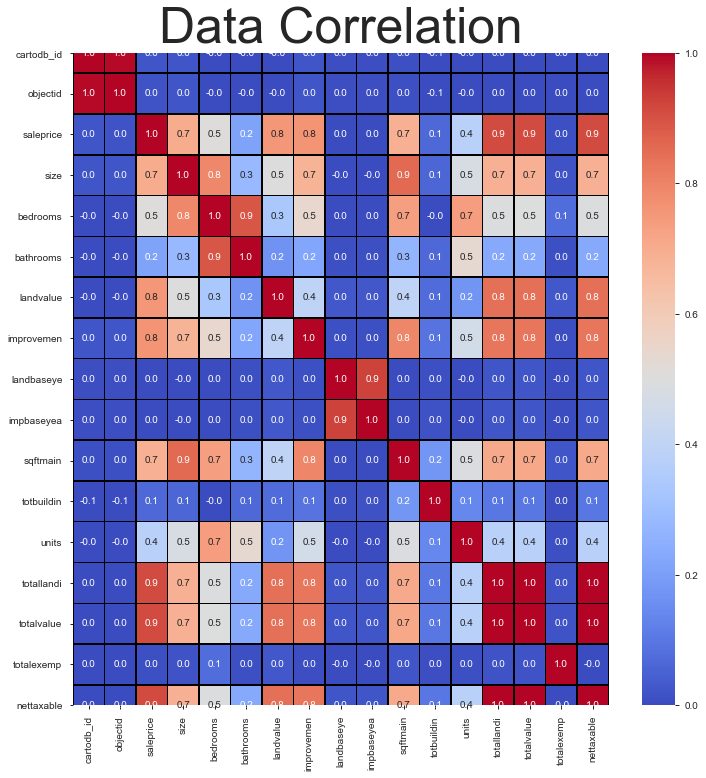

In [126]:
plt.subplots(figsize=(12,12))
sns.heatmap(gdf.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f",vmin = 0, vmax=1, cmap='coolwarm')
plt.title("Data Correlation",fontsize=50)
plt.show()

In [102]:
gdf.isnull().sum()

cartodb_id         0
safract       133066
objectid           0
ain                0
formatted_         0
saaddr             0
saaddr2         2601
saledate           0
formatte_1         0
saleprice          0
size            5628
bedrooms       10861
bathrooms       9869
yearbuilt          0
effective_         0
usecode           31
usetype            0
sastr           2601
sanum              0
saunit        109286
formatte_2         0
formatte_3      5628
propertylo      2601
generaluse         0
specificus        20
landvalue          0
improvemen         0
landbaseye         0
assessorid         0
impbaseyea         0
sqftmain           0
totbuildin         0
units              0
totallandi         0
totalvalue         0
totalexemp         0
nettaxable         0
taxrateare         0
city            2601
geometry           0
dtype: int64

In [167]:
v1 = [go.Box(y=gdf.formatte_2 ,name="Price",marker=dict(color="rgba(64,64,64,0.9)"),hoverinfo="name+y")]

layout1 = go.Layout(title="Price")

fig1 = go.Figure(data=v1,layout=layout1)
iplot(fig1)

### Analyzing the number of bathrooms and bedrooms
For the analysis, Na values would be 0

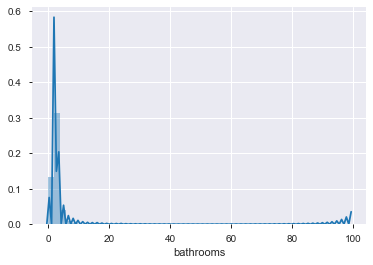

In [120]:
gdf["bathrooms"].fillna("0", inplace = True)

gdf.bathrooms = gdf.bathrooms.astype(int)
sns.distplot(gdf.bathrooms)


#### There are houses of 99 bathrooms. That is an error

In [121]:
gdf.bathrooms.max()

99

In [122]:
gdf.bathrooms.min()

0

#### Checking the 99 bathrooms with bedrooms

In [124]:
gdf.bedrooms.max()

99.0

In [128]:
gdf.loc[gdf.bedrooms == 99].shape

(26, 40)

##### When there is 99 bedrooms, there is 99 bathrooms. 

### Checking size with bedrooms

In [132]:
gdf = gdf.loc[(gdf.bedrooms < 20) & (gdf.bathrooms < 20)]

In [137]:
gdf.size.mean()

4871280.0

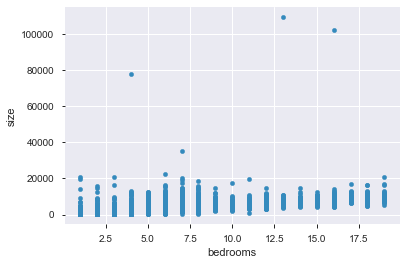

In [138]:
pd.DataFrame(gdf.loc[gdf['size'] < 4871280.0]).plot.scatter('bedrooms', 'size')

In [140]:
profile = ProfileReport(gdf.drop(['geometry'],axis=1), minimal=True)
profile.to_file(output_file="output.html")

#### We can say now that more size, more rooms

In [141]:
profile

In [143]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 121782 entries, 0 to 133325
Data columns (total 40 columns):
cartodb_id    121782 non-null int64
safract       254 non-null object
objectid      121782 non-null int64
ain           121782 non-null object
formatted_    121782 non-null object
saaddr        121782 non-null object
saaddr2       121522 non-null object
saledate      121782 non-null object
formatte_1    121782 non-null object
saleprice     121782 non-null int64
size          121780 non-null float64
bedrooms      121782 non-null float64
bathrooms     121782 non-null int32
yearbuilt     121782 non-null object
effective_    121782 non-null object
usecode       121754 non-null object
usetype       121782 non-null object
sastr         121522 non-null object
sanum         121782 non-null object
saunit        23011 non-null object
formatte_2    121782 non-null object
formatte_3    121780 non-null object
propertylo    121522 non-null object
generaluse    121782 non-null object

In [144]:
gdf_centroids = gdf.copy()
gdf_centroids['geometry'] = gdf_centroids.geometry.centroid

In [168]:
from cartoframes.viz import Map, Layer
from cartoframes.viz import size_continuous_style

Map([
    Layer(gdf_centroids)
])

In [164]:
gdf['city'].value_counts()


LOS ANGELES CA      44127
LONG BEACH CA        6041
SANTA CLARITA CA     4852
LANCASTER CA         4429
PALMDALE CA          3842
                    ...  
QUARTZ HILL             1
LOS NIETOS CA           1
RLNG HLS EST CA         1
CANYON CNTRY CA         1
ARLETA CA               1
Name: city, Length: 294, dtype: int64

In [165]:
gdf['city'].unique()

array(['HAWTHORNE CA', 'EL SEGUNDO CA', 'GARDENA CA', 'LOS ANGELES CA',
       'SANTA MONICA CA', 'LYNWOOD CA', 'CALABASAS CA',
       'WOODLAND HILLS CA', 'PASADENA CA', 'AGOURA HILLS CA',
       'SAN DIMAS CA', 'MONTEREY PARK CA', 'MAYWOOD CA', 'LONG BEACH CA',
       'GLENDALE CA', 'CULVER CITY CA', 'ALTADENA CA', 'LANCASTER CA',
       'DOWNEY CA', 'ROLLING HILLS ES CA', 'BURBANK CA', 'NORTH HILLS CA',
       'ALHAMBRA CA', 'GLENDORA CA', 'POMONA', 'SANTA CLARITA CA',
       'BALDWIN PARK CA', 'PARAMOUNT CA', 'VALENCIA CA', 'COMMERCE CA',
       'NORWALK CA', 'COMPTON CA', 'CANYON COUNTRY CA', 'COVINA CA',
       'LA VERNE CA', 'LA PUENTE CA', 'WHITTIER CA', 'PICO RIVERA CA',
       'PALMDALE CA', 'QUARTZ HILL CA', 'FAIR OAKS RANCH CA', 'WALNUT CA',
       'MONROVIA CA', None, 'VAL VERDE CA', 'CASTAIC CA', 'AZUSA CA',
       'TOPANGA CA', 'WEST HOLLYWOOD CA', 'CERRITOS CA', 'SOUTH GATE CA',
       'SAN FERNANDO CA', 'POMONA CA', 'HIDDEN HILLS CA', 'TORRANCE CA',
       'RNCHO PALOS